# INDEX

[Smart Cart. Part 4](#BM)

- [Decision Tree](#7)
- [Hyperparameter Tuning](#HT)
- [Grid Search 1](#GS)
- [Grid Search 2](#GS2)
- [Model evaluation](#ME)
- [Conclusion](#C)

<a id='INDEX'></a>

This notebook is a contiinuation of a Smart Cart Capstone Baseline model creation. In this part we will run Decision Tree Classifier model together with Hyperparameter Tuning - Grid Search with Cross-Validation within a Pipeline for hyperparameter tuning in machine learning.

---

In [2]:
# Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get rid of warning message
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Download the final train orders version of our dataframe - combined train dataset:
X_test = pd.read_csv('data/X_test_final.csv')
X_train = pd.read_csv('data/X_train_final.csv')
X_train

,aa,acai,ad,age,air,ale,alfresco,almond,almondmilk,altern,...,yam,yellow,yoghurt,yogurt,yokid,zero,zucchini,add_to_cart_order,order_number,days_since_prior_order
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,10,30.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,7,7.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20,21,8.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,8,30.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,26,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,100,4.0
1107689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,20.0
1107690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,8,18.0
1107691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,8,30.0


In [3]:
# Download the final train orders version of our dataframe - combined train dataset:
y_test = pd.read_csv('data/y_test_final.csv')
y_train = pd.read_csv('data/y_train_final.csv')
y_train

,reordered
0,0
1,1
2,0
3,0
4,1
...,...
1107688,0
1107689,1
1107690,1
1107691,0


Data sets were downloaded correctly.

## Decision Tree
<a id='7'></a>

The next model to perform is Decision Tree Classifier. It will create decision boundaries by probing further into our data.

In [4]:
#import the required library
from sklearn.tree import DecisionTreeClassifier

#instantiate and fit decision tree classifier
#dtc = DecisionTreeClassifier()
#dtc.fit(X_train, y_train)

#train and test scores
#print(f'Train_score: {dtc.score(X_train, y_train)}')
#print(f'Tes_score: {dtc.score(X_train, y_train)}')

Decision Tree model results:

Train_score: 1.0
Tes_score: 1.0

We can see that the model is clearly overfit which can happen often to Decision Tree models. Lets look for the depth that will prevent the model from overfitting:

### Hyperparameter Tuning
<a id='HT'></a>

In [5]:
# range of depth to test
depth = range(1,20,2)

#Create a list for train and test accuracy
train_accuracy = []
validation_accuracy = []

#Loop through n_components
for d in depth:
    # Instantiate and fit Decision Tree
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    tree.fit(X_train, y_train)
    
    # Evaluate the model
    train_accuracy.append(tree.score(X_train, y_train))
    validation_accuracy.append(tree.score(X_test, y_test))
    
    #print done statement for each depth
    print(f'Done with depth {d}.')

Done with depth 1.
Done with depth 3.
Done with depth 5.
Done with depth 7.
Done with depth 9.
Done with depth 11.
Done with depth 13.
Done with depth 15.
Done with depth 17.
Done with depth 19.


All of train and test accuracies are stored in lists, we can plot it to find out right max_depth:

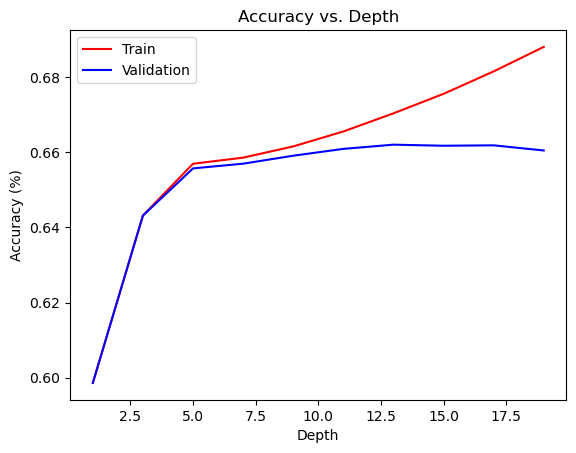

In [6]:
# Train and validation Accuracy vs Depth
plt.figure()
plt.plot(depth, train_accuracy, label='Train', color='red')
plt.plot(depth, validation_accuracy, label='Validation', color='blue')
plt.title('Accuracy vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy (%)')
plt.legend()

After plotting out our train and test accuracies over the range of max_depth that we tested, it is visible that the model starts to overfit after 11. 

The range between 5 and 11 is the best max_depth range for our model.

Next step, Hyperparameter Optimization. A smaller the range for optimization is, less time it takes for the grid search.

### Grid Search 1
<a id='GS'></a>

We are going to perform a 5 fold Cross Validation Grid Search with our Decision Tree model. This will allow us to test a range of specific hyper parameters and will output the best combination. Steps to perform:

1. Standard Scaler
2. PCA- Principal Component Analysis - reduce dimensionality of the data
3. Test a range of 3 hyper parameters: max_depth, min_samples_split, min_samples_leaf

In [7]:
# import gridsearch, pipeline, pca, time
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import time
from sklearn.preprocessing import StandardScaler

try:
#start time
    start_time = time.time()

#estimator
    estimator = Pipeline([
    ('ss', StandardScaler()),
    ('pca', PCA(n_components=20)), #PCA needs scaling
    ('dtc', DecisionTreeClassifier())
])
#parameters
    params = {
    'dtc__max_depth': [5,11], #taken from the graph
    'dtc__min_samples_split': [2,6,10],
    'dtc__min_samples_leaf': [2,6,10]
}
#grid search
    grid = GridSearchCV(estimator=estimator, param_grid=params, cv=5, verbose=2, refit=False)
    grid.fit(X_train, y_train)

#end time
    end_time = time.time()

#print time taken
    print(f'Time taken: {end_time - start_time} seconds')

except Exception as e:
    print(f"An error occurred: {e}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END dtc__max_depth=5, dtc__min_samples_leaf=2, dtc__min_samples_split=2; total time=  59.2s
[CV] END dtc__max_depth=5, dtc__min_samples_leaf=2, dtc__min_samples_split=2; total time= 1.1min
[CV] END dtc__max_depth=5, dtc__min_samples_leaf=2, dtc__min_samples_split=2; total time= 1.1min
[CV] END dtc__max_depth=5, dtc__min_samples_leaf=2, dtc__min_samples_split=2; total time= 1.3min
[CV] END dtc__max_depth=5, dtc__min_samples_leaf=2, dtc__min_samples_split=2; total time= 1.3min
[CV] END dtc__max_depth=5, dtc__min_samples_leaf=2, dtc__min_samples_split=6; total time= 1.4min
[CV] END dtc__max_depth=5, dtc__min_samples_leaf=2, dtc__min_samples_split=6; total time= 1.2min
[CV] END dtc__max_depth=5, dtc__min_samples_leaf=2, dtc__min_samples_split=6; total time= 1.3min
[CV] END dtc__max_depth=5, dtc__min_samples_leaf=2, dtc__min_samples_split=6; total time= 1.3min
[CV] END dtc__max_depth=5, dtc__min_samples_leaf=2, dtc__min_sampl

[CV] END dtc__max_depth=11, dtc__min_samples_leaf=10, dtc__min_samples_split=6; total time= 1.2min
[CV] END dtc__max_depth=11, dtc__min_samples_leaf=10, dtc__min_samples_split=6; total time= 1.2min
[CV] END dtc__max_depth=11, dtc__min_samples_leaf=10, dtc__min_samples_split=10; total time= 1.4min
[CV] END dtc__max_depth=11, dtc__min_samples_leaf=10, dtc__min_samples_split=10; total time= 1.1min
[CV] END dtc__max_depth=11, dtc__min_samples_leaf=10, dtc__min_samples_split=10; total time= 1.2min
[CV] END dtc__max_depth=11, dtc__min_samples_leaf=10, dtc__min_samples_split=10; total time= 1.2min
[CV] END dtc__max_depth=11, dtc__min_samples_leaf=10, dtc__min_samples_split=10; total time= 1.2min
Time taken: 6280.634418964386 seconds


Grid Search took approx 105 minutes (1.5 hours) to complete.

Extract the best parameters found:

In [8]:
# best parameters
grid.best_params_

{'dtc__max_depth': 11,
 'dtc__min_samples_leaf': 10,
 'dtc__min_samples_split': 6}

So, best parameters would be max_depth - 11, min_samples_leaf - 10, and min_samples_split - 6.

These are all of the parameters tested, we need to continue and perform another grid search to look at the larger values for min_samples_leaf of 8 and min_samples_split. Max_depth wont be increased in order to avoid overfitting of the model.

Taking best parameters and fitting them to a new Decision Tree model, so we can make sure the model is no longer overfitting:

In [11]:
#instantiate and fit decision tree classifier with best parameters:
dtc = DecisionTreeClassifier(max_depth=11, min_samples_leaf=10, min_samples_split=6)
dtc.fit(X_train, y_train)

#train and test scores
print(f'Train_score: {dtc.score(X_train, y_train)}')
print(f'Test_score: {dtc.score(X_test, y_test)}')

Train_score: 0.6649116677635409
Test_score: 0.6609647412286404


Train_score: 0.6649116677635409
Test_score: 0.6609647412286404


The model is no longer overfitting. 

Our train accuracy has significantly decreased from 100% to 66.54% and our test accuracy has decreased from 100% to 66.54%. 

See classification report and confusion matrix.

In [21]:
# Training and test score for DTC
dtc_train_score = dtc.score(X_train, y_train)
dtc_test_score = dtc.score(X_test, y_test)

0.6649865982722649

In [28]:
# Create an empty datafram to store the metrics
metrics_df = pd.DataFrame(columns=['Hyperparameter', 'Training Accuracy', 'Test Accuracy', 'Notes'])

# Add the metrics for the baseline models
metrics_df.loc['Decision Tree'] = ['depth=11, min_s_leaf=10, min_s_split=6',dtc_train_score, dtc_test_score,'performance is relatively consistent']

# Print the comparison table
metrics_df

,Hyperparamater,Training Accuracy,Test Accuracy,Notes
Decision Tree,"depth=11, min_s_leaf=10, min_s_split=6",0.664987,0.660954,performance is relatively consistent


In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Evaluate the model

# Predict on the test data
y_pred = dtc.predict(X_test)

# Generate and print a classification report to evaluate the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(report)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.60      0.45      0.51    111159
           1       0.68      0.80      0.74    165765

    accuracy                           0.66    276924
   macro avg       0.64      0.63      0.63    276924
weighted avg       0.65      0.66      0.65    276924

[[ 49778  61381]
 [ 32506 133259]]


For class 0, the precision is 0.60, which means that out of all the instances predicted as class 0, 60% were correct. The recall for class 0 is 0.45, indicating that 45% of the actual class 0 instances were correctly predicted.
For class 1, the precision is 0.68, suggesting that 68% of the instances predicted as class 1 were correct. The recall for class 1 is 0.80, meaning that 80% of the actual class 1 instances were correctly predicted.
F1-Score:

The F1-score is a harmonic mean of precision and recall. For class 0, it is 0.51, and for class 1, it is 0.74. These scores provide a balance between precision and recall for each class.

The model appears to perform reasonably well, with higher precision and recall for class 1 compared to class 0. However, there is room for improvement in the model's performance, especially in terms of class 0 where both precision and recall are relatively lower.

Precision - % of positive predictions that are actually positive.
Recall - % of actual positive predictions that are model predicted as positive.

### Grid Search 2
<a id='GS2'></a>

In [13]:
try:
#start time
    start_time = time.time()

#estimator
    estimator = Pipeline([
    ('ss', StandardScaler()),
    ('pca', PCA(n_components=20)), #PCA needs scaling
    ('dtc', DecisionTreeClassifier())
])
#parameters
    params = {
    'dtc__min_samples_split': [6, 8, 10],
    'dtc__min_samples_leaf': [10, 12, 15]
}
#grid search
    grid2 = GridSearchCV(estimator=estimator, param_grid=params, cv=5, verbose=2, refit=False)
    grid2.fit(X_train, y_train)

#end time
    end_time = time.time()

#print time taken
    print(f'Time taken: {end_time - start_time} seconds')

except Exception as e:
    print(f"An error occurred: {e}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .dtc__min_samples_leaf=10, dtc__min_samples_split=6; total time= 1.4min
[CV] END .dtc__min_samples_leaf=10, dtc__min_samples_split=6; total time= 1.4min
[CV] END .dtc__min_samples_leaf=10, dtc__min_samples_split=6; total time= 1.3min
[CV] END .dtc__min_samples_leaf=10, dtc__min_samples_split=6; total time= 1.3min
[CV] END .dtc__min_samples_leaf=10, dtc__min_samples_split=6; total time= 1.3min
[CV] END .dtc__min_samples_leaf=10, dtc__min_samples_split=8; total time= 1.5min
[CV] END .dtc__min_samples_leaf=10, dtc__min_samples_split=8; total time= 1.3min
[CV] END .dtc__min_samples_leaf=10, dtc__min_samples_split=8; total time= 1.4min
[CV] END .dtc__min_samples_leaf=10, dtc__min_samples_split=8; total time= 1.3min
[CV] END .dtc__min_samples_leaf=10, dtc__min_samples_split=8; total time= 1.4min
[CV] END dtc__min_samples_leaf=10, dtc__min_samples_split=10; total time= 1.3min
[CV] END dtc__min_samples_leaf=10, dtc__min_sampl

Second grid took less time to complete - 59 min.

Now, getting the best parameters like in the grid 1:

In [14]:
# best parameters
grid2.best_params_

{'dtc__min_samples_leaf': 15, 'dtc__min_samples_split': 6}

Best parameters found min_samples_leaf - 15, and min_samples_split - 6.
Fitting our parameters to a Decision Tree to check if the scores have increased:

In [17]:
#instantiate and fit decision tree classifier with best parameters:
dtc2 = DecisionTreeClassifier(max_depth=11, min_samples_leaf=15, min_samples_split=6)
dtc2.fit(X_train, y_train)

#train and test scores
print(f'Train_score: {dtc2.score(X_train, y_train)}')
print(f'Test_score: {dtc2.score(X_test, y_test)}')

Train_score: 0.6646516679260409
Test_score: 0.6611091851916049


Train_score: 0.6646516679260409
Test_score: 0.6611091851916049

Test accuracy have increased to 66,11% where train acc has decreased to 66,47%. The model does not overfit. Lets check classification report and confusion matrix:

In [30]:
# Training and test score for DTC Regression
dtc2_train_score = dtc2.score(X_train, y_train)
dtc2_test_score = dtc2.score(X_test, y_test)

### Model evaluation
<a id='ME'></a>

In [18]:
# Evaluate the model

# Predict on the test data
y_pred = dtc2.predict(X_test)

# Generate and print a classification report to evaluate the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(report)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.61      0.45      0.52    111159
           1       0.68      0.80      0.74    165765

    accuracy                           0.66    276924
   macro avg       0.64      0.63      0.63    276924
weighted avg       0.65      0.66      0.65    276924

[[ 49862  61297]
 [ 32550 133215]]


Both models have the same accuracy of 0.66. 
Model performance improved for class 0, where precision is 0.61, recall is 0.45, and F1-score is 0.52.

The differences between these two results are very marginal. The second result shows a slight improvement in predicting negative cases (Class 0), as indicated by a small increase in precision and F1-score for Class 0, and a small increase in true negatives. 

However, the overall accuracy and the metrics for Class 1 remain almost identical. This suggests that the changes made between these two models (if any) had a very minor impact, improving the prediction of negatives slightly while maintaining overall performance.


Optimized Decision Tree model still performed worse then the base logistic regression model. 

In [32]:
#Summary table
# Add the metrics for the baseline models
metrics_df.loc['Decision Tree2'] = ['depth=11, min_s_leaf=15, min_s_split=6',dtc2_train_score, dtc2_test_score,'slightly better performance for class 0']

# Print the comparison table
metrics_df

,Hyperparamater,Training Accuracy,Test Accuracy,Notes
Decision Tree,"depth=11, min_s_leaf=10, min_s_split=6",0.664987,0.660954,performance is relatively consistent
Decision Tree2,"depth=11, min_s_leaf=15, min_s_split=6",0.664652,0.661109,Slightly better performance for class 0


In [4]:
#Summary table LR model
# Create an empty datafram to store the metrics
metrics_lr_df = pd.DataFrame(columns=['Hyperparameter', 'Training Accuracy', 'Test Accuracy', 'Notes'])

# Add the metrics for the baseline models

metrics_lr_df.loc['Logistic regression'] = ['none','0.66459', '0.66392','good performance']
metrics_lr_df.loc['Logistic regression scaled'] = ['scaled','0.66574', '0.66514','performance improved after scaling']

# Print the comparison table
metrics_lr_df

,Hyperparameter,Training Accuracy,Test Accuracy,Notes
Logistic regression,none,0.66459,0.66392,good performance
Logistic regression scaled,scaled,0.66574,0.66514,performance improved after scaling


### Conclusion
<a id='C'></a>

The best acuracy so far has showed Logistic Regression model. 

LR model demonstrates a slight improvement in precision for both classes and in recall for Class 1, indicating better overall performance in correctly predicting positive cases.
The overall accuracy is slightly higher in the Logistic Regression model.
The decrease in recall for Class 0 and the increase in false positives might indicate a slight trade-off, where the model is more biased towards predicting positive cases. This is also reflected in the higher number of true positives.
The improvements in the LR model, while marginal, suggest it may be slightly better at balancing precision and recall, especially for Class 1. However, this comes with a slight increase in the false positive rate for Class 0.

### [BACK TO INDEX](#INDEX)